In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import Axes
from helpers import get_years_dfs

In [2]:
def get_full_df(input_path: str):
    return pd.concat(get_years_dfs(input_path))

In [3]:
def get_summary_dfs(input_path: str):
    df = get_full_df(input_path)

    all_polarities_summary_df = df.groupby("year")["polarity"].describe().reset_index()
    positive_polarities_summary_df = df[df["polarity"] > 0].groupby("year")["polarity"].describe().reset_index()
    negative_polarities_summary_df = df[df["polarity"] < 0].groupby("year")["polarity"].describe().reset_index()
    subjectivity_summary_df = df.groupby("year")["subjectivity"].describe().reset_index()

    return  all_polarities_summary_df, \
            positive_polarities_summary_df, \
            negative_polarities_summary_df, \
            subjectivity_summary_df

### Body text

In [4]:
all_types_all_polarities, \
all_types_positive_polarity, \
all_types_negative_polarity, \
all_types_subjectivity \
    = get_summary_dfs("./output/sentiment.xlsx")

In [5]:
news_and_blog_all_polarities, \
news_and_blog_positive_polarity, \
news_and_blog_negative_polarity, \
news_and_blog_subjectivity \
    = get_summary_dfs("./output/news_and_blog/sentiment_news_and_blog.xlsx")

In [6]:
press_release_all_polarities, \
press_release_positive_polarity, \
press_release_negative_polarity, \
press_release_subjectivity \
    = get_summary_dfs("./output/press_release/sentiment_press_release.xlsx")

In [7]:
social_media_all_polarities, \
social_media_positive_polarity, \
social_media_negative_polarity, \
social_media_subjectivity \
    = get_summary_dfs("./output/social_media/sentiment_social_media.xlsx")

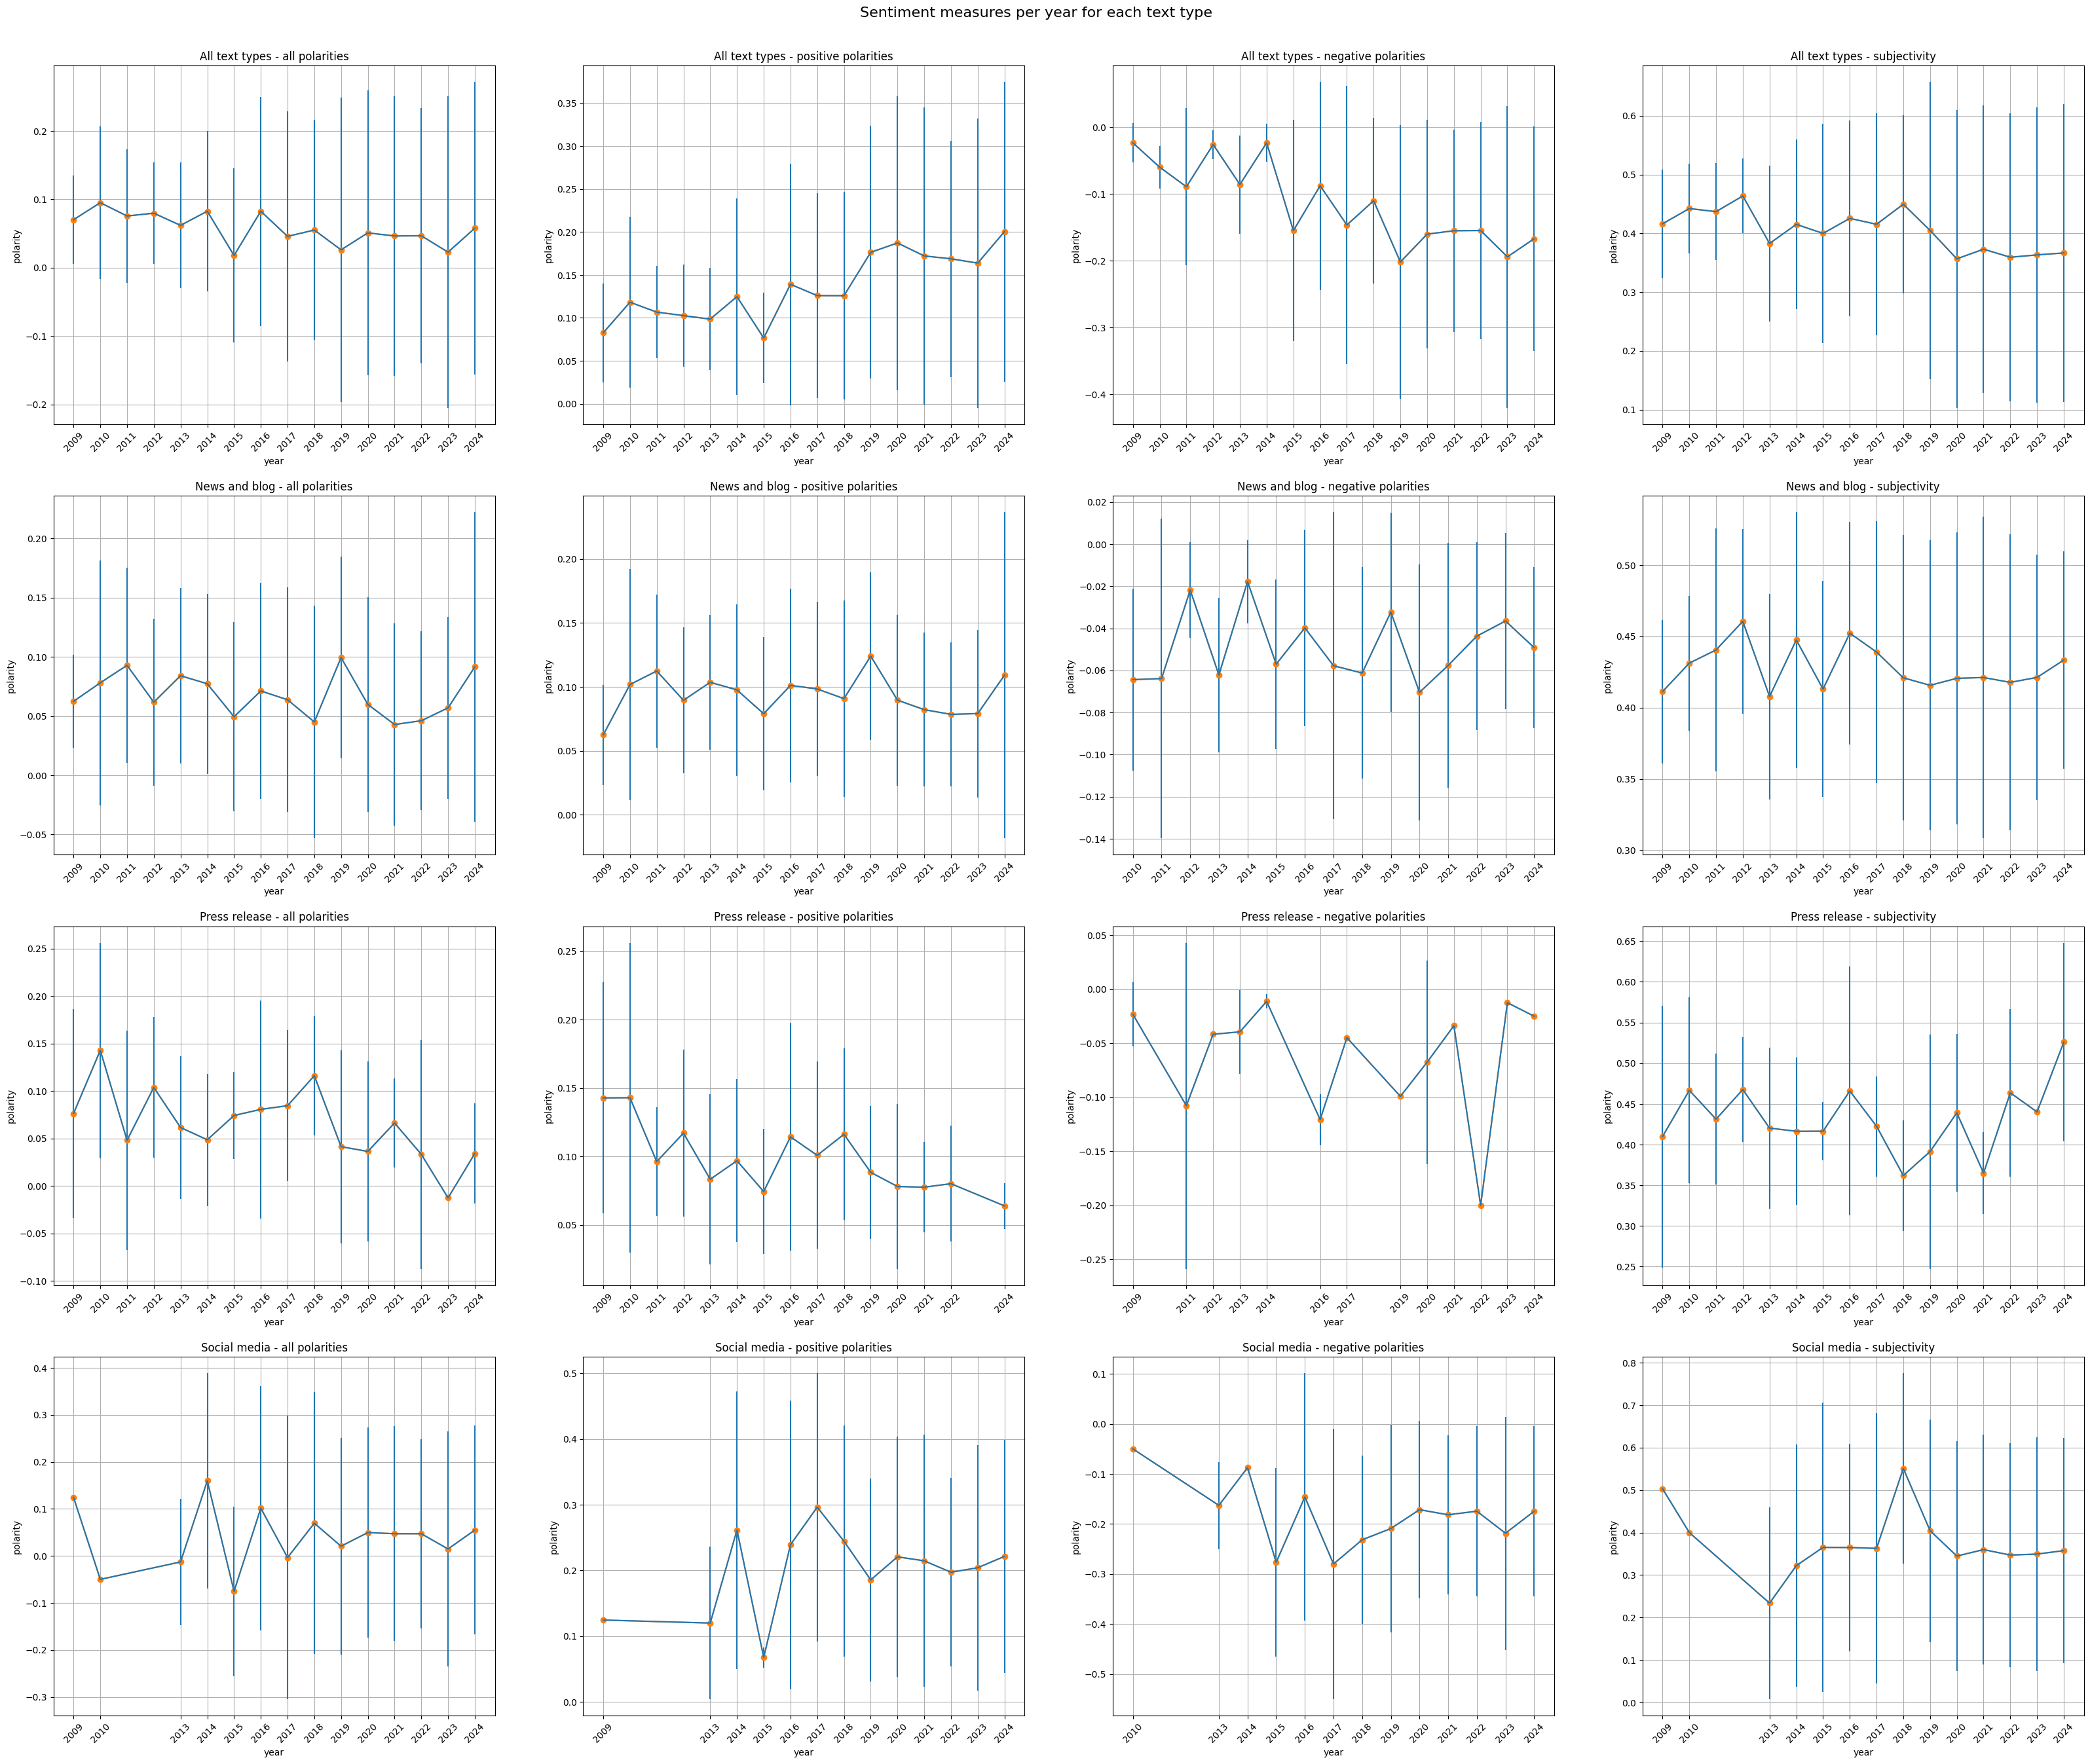

In [8]:
fig, axes = plt.subplots(
    nrows=4, 
    ncols=4, 
    figsize=(40, 30),
    squeeze=False
)

axes_flat: list[Axes] = axes.flatten()

fig.suptitle("Sentiment measures per year for each text type", fontsize=16)
fig.subplots_adjust(top=0.95)

def plot_data_on_ax(i: str, df: pd.DataFrame, title: str):
    years = list(df["year"])
    
    ax = axes_flat[i]

    ax.set_title(title)

    ax.set_xlabel("year")
    ax.grid(True)
    
    ax.set_xticks(list(years))
    ax.set_xticklabels([str(y) for y in years])
    ax.tick_params(axis="x", rotation=45)

    ax.set_ylabel("polarity")

    ax.errorbar(
        x=years, 
        y=df["mean"], 
        yerr=df["std"],
    )
    ax.plot(years, df["mean"], marker="o")

plot_data_on_ax(0, all_types_all_polarities, "All text types - all polarities")
plot_data_on_ax(1, all_types_positive_polarity, "All text types - positive polarities")
plot_data_on_ax(2, all_types_negative_polarity, "All text types - negative polarities")
plot_data_on_ax(3, all_types_subjectivity, "All text types - subjectivity")

plot_data_on_ax(4, news_and_blog_all_polarities, "News and blog - all polarities")
plot_data_on_ax(5, news_and_blog_positive_polarity, "News and blog - positive polarities")
plot_data_on_ax(6, news_and_blog_negative_polarity, "News and blog - negative polarities")
plot_data_on_ax(7, news_and_blog_subjectivity, "News and blog - subjectivity")

plot_data_on_ax(8, press_release_all_polarities, "Press release - all polarities")
plot_data_on_ax(9, press_release_positive_polarity, "Press release - positive polarities")
plot_data_on_ax(10, press_release_negative_polarity, "Press release - negative polarities")
plot_data_on_ax(11, press_release_subjectivity, "Press release - subjectivity")

plot_data_on_ax(12, social_media_all_polarities, "Social media - all polarities")
plot_data_on_ax(13, social_media_positive_polarity, "Social media - positive polarities")
plot_data_on_ax(14, social_media_negative_polarity, "Social media - negative polarities")
plot_data_on_ax(15, social_media_subjectivity, "Social media - subjectivity")

fig.savefig("./visualization/sentiment/lineplot.png")

### Headline text

Excluding social media headlines because there are so little of them.

In [9]:
all_types_all_polarities, \
all_types_positive_polarity, \
all_types_negative_polarity, \
all_types_subjectivity \
    = get_summary_dfs("./output/sentiment_headlines.xlsx")

In [10]:
news_and_blog_all_polarities, \
news_and_blog_positive_polarity, \
news_and_blog_negative_polarity, \
news_and_blog_subjectivity \
    = get_summary_dfs("./output/news_and_blog/sentiment_news_and_blog_headlines.xlsx")

In [11]:
press_release_all_polarities, \
press_release_positive_polarity, \
press_release_negative_polarity, \
press_release_subjectivity \
    = get_summary_dfs("./output/press_release/sentiment_press_release_headlines.xlsx")

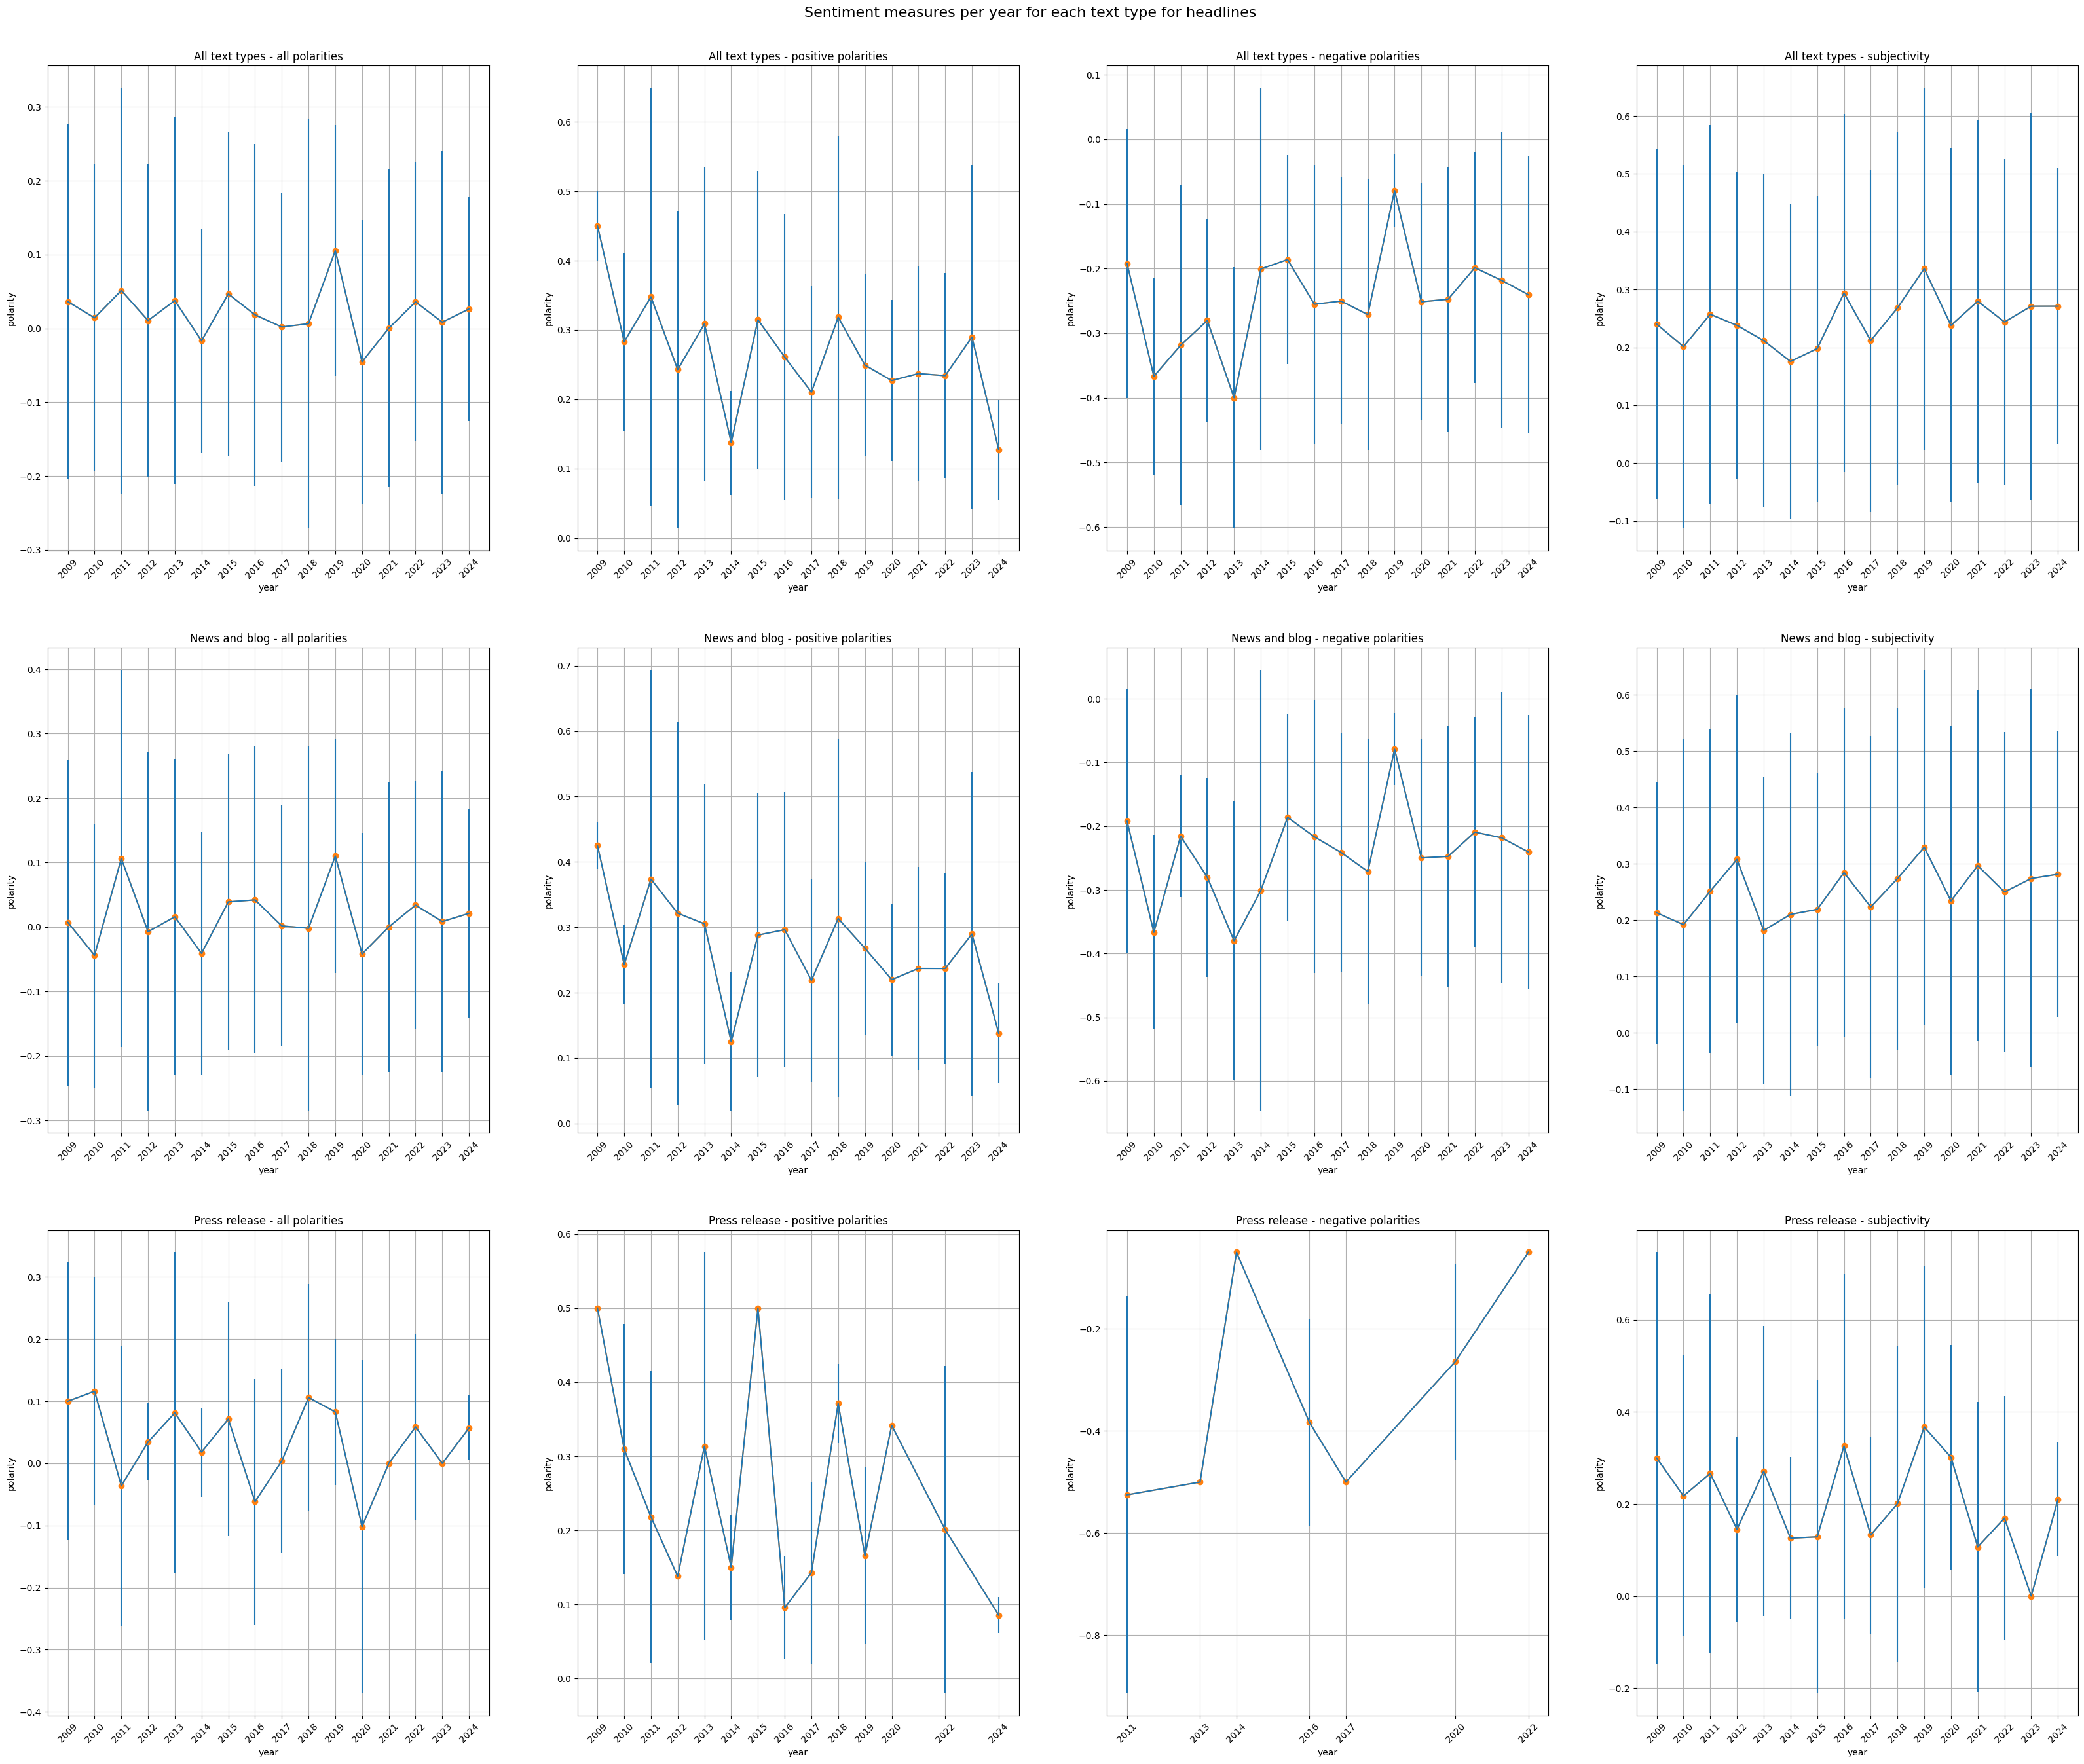

In [12]:
fig, axes = plt.subplots(
    nrows=3, 
    ncols=4, 
    figsize=(40, 30),
    squeeze=False
)

axes_flat: list[Axes] = axes.flatten()

fig.suptitle("Sentiment measures per year for each text type for headlines", fontsize=16)
fig.subplots_adjust(top=0.95)

def plot_data_on_ax(i: str, df: pd.DataFrame, title: str):
    years = list(df["year"])
    
    ax = axes_flat[i]

    ax.set_title(title)

    ax.set_xlabel("year")
    ax.grid(True)
    
    ax.set_xticks(list(years))
    ax.set_xticklabels([str(y) for y in years])
    ax.tick_params(axis="x", rotation=45)

    ax.set_ylabel("polarity")

    ax.errorbar(
        x=years, 
        y=df["mean"], 
        yerr=df["std"],
    )
    ax.plot(years, df["mean"], marker="o")

plot_data_on_ax(0, all_types_all_polarities, "All text types - all polarities")
plot_data_on_ax(1, all_types_positive_polarity, "All text types - positive polarities")
plot_data_on_ax(2, all_types_negative_polarity, "All text types - negative polarities")
plot_data_on_ax(3, all_types_subjectivity, "All text types - subjectivity")

plot_data_on_ax(4, news_and_blog_all_polarities, "News and blog - all polarities")
plot_data_on_ax(5, news_and_blog_positive_polarity, "News and blog - positive polarities")
plot_data_on_ax(6, news_and_blog_negative_polarity, "News and blog - negative polarities")
plot_data_on_ax(7, news_and_blog_subjectivity, "News and blog - subjectivity")

plot_data_on_ax(8, press_release_all_polarities, "Press release - all polarities")
plot_data_on_ax(9, press_release_positive_polarity, "Press release - positive polarities")
plot_data_on_ax(10, press_release_negative_polarity, "Press release - negative polarities")
plot_data_on_ax(11, press_release_subjectivity, "Press release - subjectivity")

fig.savefig("./visualization/sentiment/lineplot_headlines.png")